In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/american-express-user-exit-prediction/American Express User Exit Prediction.csv')
df

,Credit Score,Geography,Gender,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed
0,553,Delhi,Female,45,4,0.000000e+00,4,1,274150,0
1,447,Bengaluru,Male,31,7,0.000000e+00,4,1,519360,0
2,501,Delhi,Female,32,2,0.000000e+00,4,1,545501,0
3,428,Delhi,Male,51,3,0.000000e+00,4,1,86868,0
4,492,Delhi,Female,57,6,1.912682e+06,2,1,518680,0
...,...,...,...,...,...,...,...,...,...,...
9922,594,Bengaluru,Male,28,6,0.000000e+00,4,1,394810,0
9923,557,Bengaluru,Male,59,3,8.050490e+05,2,0,58163,1
9924,627,Mumbai,Female,42,4,1.893594e+06,4,0,494067,0
9925,600,Bengaluru,Female,51,0,9.031778e+05,2,1,109375,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9927 entries, 0 to 9926
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit Score             9927 non-null   int64  
 1   Geography                9927 non-null   object 
 2   Gender                   9927 non-null   object 
 3   Age                      9927 non-null   int64  
 4   Customer Since           9927 non-null   int64  
 5   Current Account          9927 non-null   float64
 6   Num of products          9927 non-null   int64  
 7   UPI Enabled              9927 non-null   int64  
 8   Estimated Yearly Income  9927 non-null   int64  
 9   Closed                   9927 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 775.7+ KB


In [5]:
df['Closed'].value_counts()

Closed
0    7899
1    2028
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
Bengaluru    4980
Mumbai       2492
Delhi        2455
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Female    5413
Male      4514
Name: count, dtype: int64

In [8]:
df['Current Account'].value_counts()

Current Account
0.000000e+00    3600
1.291822e+06       2
1.698176e+06       2
1.991390e+06       1
2.966633e+05       1
                ... 
1.220339e+06       1
1.700477e+06       1
1.653420e+06       1
1.374281e+06       1
9.031778e+05       1
Name: count, Length: 6326, dtype: int64

In [9]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [10]:
df

,Credit Score,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed,Geography_Delhi,Geography_Mumbai,Gender_Male
0,553,45,4,0.000000e+00,4,1,274150,0,1,0,0
1,447,31,7,0.000000e+00,4,1,519360,0,0,0,1
2,501,32,2,0.000000e+00,4,1,545501,0,1,0,0
3,428,51,3,0.000000e+00,4,1,86868,0,1,0,1
4,492,57,6,1.912682e+06,2,1,518680,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9922,594,28,6,0.000000e+00,4,1,394810,0,0,0,1
9923,557,59,3,8.050490e+05,2,0,58163,1,0,0,1
9924,627,42,4,1.893594e+06,4,0,494067,0,0,1,0
9925,600,51,0,9.031778e+05,2,1,109375,1,0,0,0


In [11]:
#Apply Binarization here on Current Account feature
from sklearn.preprocessing import Binarizer

df['Current Account'] = Binarizer().fit_transform(df[['Current Account']]).astype(int)

In [12]:
df

,Credit Score,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed,Geography_Delhi,Geography_Mumbai,Gender_Male
0,553,45,4,0,4,1,274150,0,1,0,0
1,447,31,7,0,4,1,519360,0,0,0,1
2,501,32,2,0,4,1,545501,0,1,0,0
3,428,51,3,0,4,1,86868,0,1,0,1
4,492,57,6,1,2,1,518680,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9922,594,28,6,0,4,1,394810,0,0,0,1
9923,557,59,3,1,2,0,58163,1,0,0,1
9924,627,42,4,1,4,0,494067,0,0,1,0
9925,600,51,0,1,2,1,109375,1,0,0,0


In [13]:
X = df.drop(columns=['Closed'])
y = df['Closed']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-09-28 06:20:37.772866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759040438.051037      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759040438.127047      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=10))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249 (996.00 B)

 Trainable params: 249 (996.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7941 - loss: 0.5520
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7985 - loss: 0.4426
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7891 - loss: 0.4433
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.4169
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7859 - loss: 0.4257
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4128
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4158
Epoch 8/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.4121
Epoch 9/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.4016
Epoch 10/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8364 - loss: 0.3877
Epoch 11/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8410 - loss: 0.3815
Epoch 12/100
218/218 ━━━━━━━━━━━━━━━━━━━━

In [22]:
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred>0.5,1,0)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8439073514602216

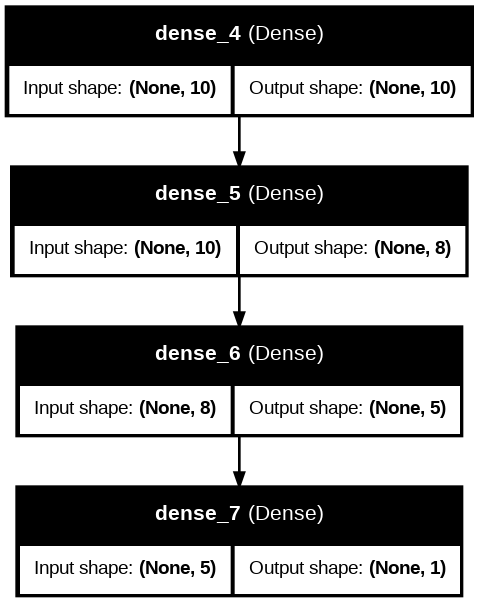

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True, dpi=96)